In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
scipy.__version__
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import pymysql
pymysql.install_as_MySQLdb()
from urllib.parse import quote_plus as urlquote
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df_2001 = pd.read_csv("data/final_tmdb_data_2001.csv.gz")
df_2001.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0034413,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1022890.0,en,Youth Gets a Break,...,0.0,20.0,[],Released,NaN,Youth Gets a Break,0.0,0.0,0.0,NaN


In [3]:
df_2002 = pd.read_csv("data/final_tmdb_data_2002.csv.gz")
df_2002.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.4,13.0,NaN


In [4]:
df = pd.concat([df_2001, df_2002], ignore_index=True, sort=False)

In [5]:
# Setting the id as the index
df = df.set_index('imdb_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5537 entries, 0 to tt0412489
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5535 non-null   float64
 1   backdrop_path          2244 non-null   object 
 2   belongs_to_collection  457 non-null    object 
 3   budget                 5535 non-null   float64
 4   genres                 5535 non-null   object 
 5   homepage               393 non-null    object 
 6   id                     5535 non-null   float64
 7   original_language      5535 non-null   object 
 8   original_title         5535 non-null   object 
 9   overview               5373 non-null   object 
 10  popularity             5535 non-null   float64
 11  poster_path            4702 non-null   object 
 12  production_companies   5535 non-null   object 
 13  production_countries   5535 non-null   object 
 14  release_date           5414 non-null   object 
 15  reve

In [6]:
df = df.dropna()

Q1: Does rating affect revenue?

Null = Rating has no affect on revenue.

Alternative = Rating does affect revenue.

In [7]:
df['certification'].value_counts()

PG-13    17
PG        9
R         9
G         5
NR        2
Name: certification, dtype: int64

In [8]:
df['revenue'].describe()

count    4.200000e+01
mean     2.411132e+08
std      2.905927e+08
min      0.000000e+00
25%      1.867759e+07
50%      1.601716e+08
75%      3.616776e+08
max      9.764756e+08
Name: revenue, dtype: float64

Multiple numerical samples point to use of Tukey/ANOVA

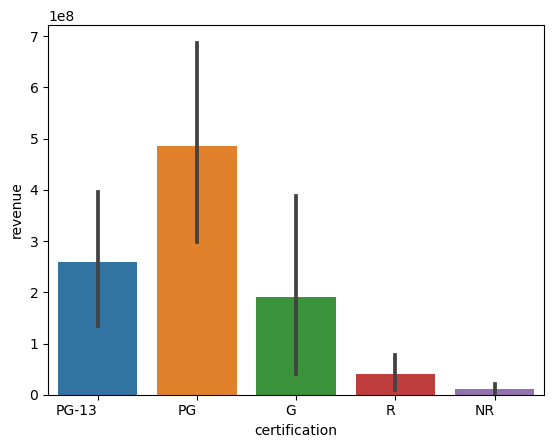

In [9]:
ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), ha='right');

In [10]:
cols_used = ['certification','revenue']
df[cols_used]

,certification,revenue
imdb_id,,
tt0120737,PG-13,871368364.0
tt0126029,PG,487900000.0
tt0198781,G,579700000.0
tt0221218,PG-13,23619609.0
tt0230011,PG,186053725.0
tt0232500,PG-13,207283925.0
tt0239395,PG,93375151.0
tt0240772,PG-13,450717150.0
tt0241527,PG,976475550.0


In [11]:
## Create a dictionary
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp

groups.keys()

dict_keys(['PG-13', 'PG', 'G', 'R', 'NR'])

In [12]:
## Loop through groups dict
for certification, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {certification} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data

There were 0 outliers in the PG-13 group.
There were 0 outliers in the PG group.
There were 0 outliers in the G group.
There were 0 outliers in the R group.
There were 0 outliers in the NR group.


No outliers. Normality and equal variance.

In [13]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\benja\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\benja\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ValueError: skewtest is not valid with less than 8 samples; 5 samples were given.

In [14]:
## Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=2.656521113560497, pvalue=0.048030578357879314)


In [15]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [16]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=14.631104728203866, pvalue=0.0055307888533712045)


True

Post-hoc multiple comparison tests

In [17]:
## slice a test sector
temp = groups['G']
temp

imdb_id
tt0198781    579700000.0
tt0287635     28023563.0
tt0243585    170000000.0
tt0257778            0.0
tt0304669    172842355.0
Name: revenue, dtype: float64

In [18]:
## test a dataframe 
pd.DataFrame({'revenue':temp, 'certification':'G'})

,revenue,certification
imdb_id,,
tt0198781,579700000.0,G
tt0287635,28023563.0,G
tt0243585,170000000.0,G
tt0257778,0.0,G
tt0304669,172842355.0,G


In [19]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for certification, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue':temp, 'certification':certification})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,certification
imdb_id,,
tt0120737,871368364.0,PG-13
tt0221218,23619609.0,PG-13
tt0232500,207283925.0,PG-13
tt0240772,450717150.0,PG-13
tt0265171,0.0,PG-13
tt1073223,0.0,PG-13
tt0120912,445135288.0,PG-13
tt0167261,926287400.0,PG-13
tt0246460,431971116.0,PG-13


In [20]:
## save the values 
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NR,-179679224.1,0.9174,-795345707.0298,435987258.8298,False
G,PG,295914977.4,0.2558,-114529344.5532,706359299.3532,False
G,PG-13,69286274.1647,0.9836,-305081423.5833,443653971.9127,False
G,R,-148860394.1556,0.8352,-559304716.1088,261583927.7977,False
NR,PG,475594201.5,0.1464,-99655737.2937,1050844140.2937,False
NR,PG-13,248965498.2647,0.6943,-301124606.8778,799055603.4072,False
NR,R,30818829.9444,0.9999,-544431108.8492,606068768.7381,False
PG,PG-13,-226628703.2353,0.2246,-529974128.4457,76716721.9751,False
PG,R,-444775371.5556,0.0063,-791664136.5835,-97886606.5276,True
PG-13,R,-218146668.3203,0.2581,-521492093.5307,85198756.8902,False


C:\Users\benja\AppData\Local\Temp\ipykernel_21144\2645591382.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)


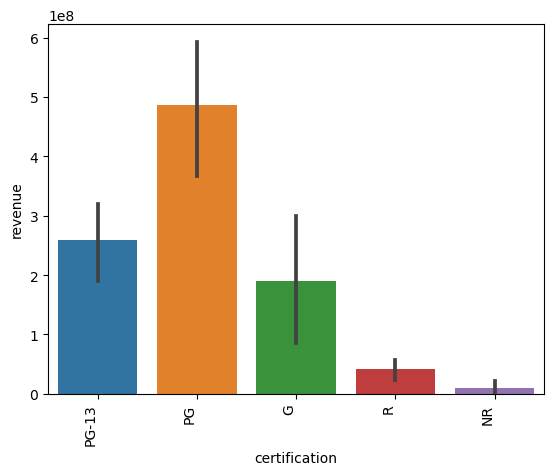

In [21]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

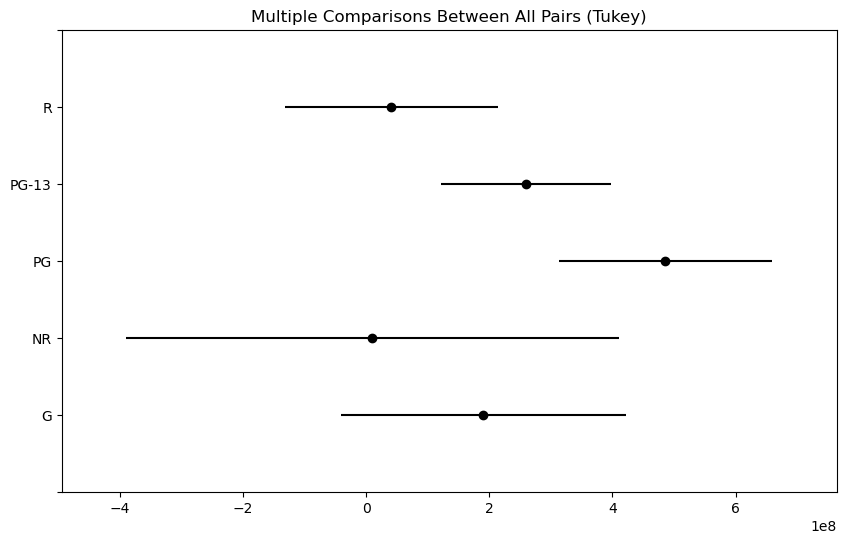

In [22]:
## tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

Certification does impact revenue.

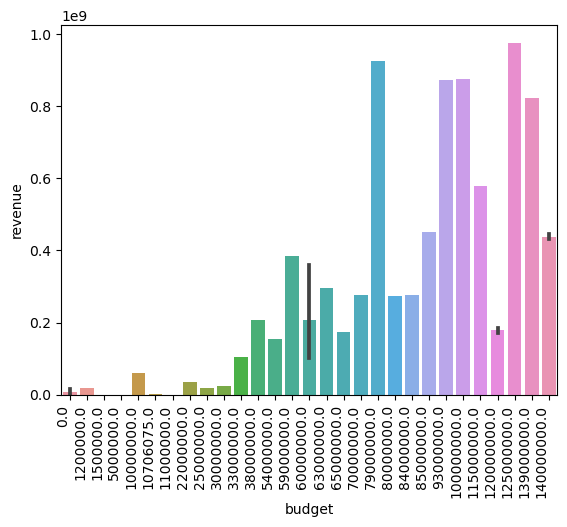

In [23]:
ax = sns.barplot(data=df, x='budget', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');

In [24]:
## Create a dictionary with each group as key and funded_amount as values
groups ={}

for budget in df['budget'].unique():
    temp = df.loc[df['budget']== budget, 'revenue']
    groups[budget] = temp

groups.keys()

dict_keys([93000000.0, 60000000.0, 115000000.0, 30000000.0, 120000000.0, 38000000.0, 85000000.0, 125000000.0, 1200000.0, 22000000.0, 10000000.0, 1500000.0, 0.0, 33000000.0, 140000000.0, 139000000.0, 79000000.0, 54000000.0, 11000000.0, 84000000.0, 59000000.0, 80000000.0, 63000000.0, 100000000.0, 70000000.0, 25000000.0, 65000000.0, 10706075.0, 5000000.0])

In [26]:
## Loop through groups dict
for budget, data in groups.items():
    ## Determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## Get the sector name (which is the key of the dictionary)
    sector = budget
    
    ## Print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outliers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[budget] = data

There were 0 outliers in the 93000000.0 group.
There were 0 outliers in the 60000000.0 group.
There were 0 outliers in the 115000000.0 group.
There were 0 outliers in the 30000000.0 group.
There were 0 outliers in the 120000000.0 group.
There were 0 outliers in the 38000000.0 group.
There were 0 outliers in the 85000000.0 group.
There were 0 outliers in the 125000000.0 group.
There were 0 outliers in the 1200000.0 group.
There were 0 outliers in the 22000000.0 group.
There were 0 outliers in the 10000000.0 group.
There were 0 outliers in the 1500000.0 group.
There were 0 outliers in the 0.0 group.
There were 0 outliers in the 33000000.0 group.
There were 0 outliers in the 140000000.0 group.
There were 0 outliers in the 139000000.0 group.
There were 0 outliers in the 79000000.0 group.
There were 0 outliers in the 54000000.0 group.
There were 0 outliers in the 11000000.0 group.
There were 0 outliers in the 84000000.0 group.
There were 0 outliers in the 59000000.0 group.
There were 0 outl

In [27]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for budget, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([budget,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\benja\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)


ValueError: skewtest is not valid with less than 8 samples; 1 samples were given.

Groups are large enough that we can ignore assumption of normality.

In [28]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=0.36366508015532456, pvalue=0.9878814117988909)


In [29]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups DO have equal variance.


In [30]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=38.60884902504692, pvalue=0.08742239717863372)


False

P-Value less than .05. Null hypothesis rejected.

Multiple Comparison Test

In [32]:
## test making a datafrae from the test 
pd.DataFrame({'budget':temp, 'revenue':'165000000.0'})

,budget,revenue
imdb_id,,
tt0338450,0.0,165000000.0


In [33]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for budget, temp in groups.items():
    
    ## make a temp_df with the name
    temp_df = pd.DataFrame({'revenue':temp, 'budget':budget})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,budget
imdb_id,,
tt0120737,871368364.0,93000000.0
tt0126029,487900000.0,60000000.0
tt0239395,93375151.0,60000000.0
tt0253754,67312826.0,60000000.0
tt0258463,214034224.0,60000000.0
tt0277296,165333180.0,60000000.0
tt0198781,579700000.0,115000000.0
tt0221218,23619609.0,30000000.0
tt0230011,186053725.0,120000000.0


In [ ]:
## save the values 
values = tukeys_data['budget']
labels = tukeys_data['revenue']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
# Convert the SimpleTable object to a pandas DataFrame
limited_summary = pd.DataFrame(summary_table.data[1:], columns=summary_table.data[0])

# Display the first 10 rows of the summary
print(limited_summary.head(10))

In [ ]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='budget', y='revenue', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

In [ ]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

In [ ]:
## tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

Q: Does rating affect popularity?

Null: rating does not affect popularity.
Alternative: Rating does affect popularity.

In [ ]:
ax = sns.barplot(data=df, x='certification', y='popularity')
ax.set_xticklabels(ax.get_xticklabels(), ha='right'

In [ ]:
called_cols =  ['certification','popularity']
df[called_cols]

In [ ]:
## Create a dictionary
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'popularity']
    groups[certification] = temp

groups.keys()

In [ ]:
## Loop through groups dict
for certification, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {certification} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data

In [ ]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

In [ ]:
## Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

In [ ]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

In [ ]:
result = stats.f_oneway( *groups.values())
result

In [ ]:
## slice a test 
temp = groups["G"]
temp

In [ ]:
pd.DataFrame({'popularity':temp, 'certification':'G'})

## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for certification, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'popularity':temp, 'certification':certification})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

In [ ]:
## save the values 
values = tukeys_data['popularity']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

In [ ]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='popularity', errorbar=('ci', 68))
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

In [ ]:
tukeys_results.plot_simultaneous();

In [ ]:
Null hypothesis rejected.